In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import mstats

C:\Users\Gebruiker\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_excel('Final dataset for real.xlsx', index_col = 0)

In [253]:
data = pd.read_excel('Final dataset for real without employee.xlsx', index_col = 0)

In [3]:
data.head()

Country ISO code  Nr. of Tax Treaties  \
Company name                                                         
(Y.Z)QUEENCO LIMITED                       IL                   66   
01 COMMUNIQUE LABORATORY INC               CA                   84   
01CYBERATON PROENERGY SA                   PL                   82   
09WOMEN CO.,LTD.                           KR                   93   
1000MERCIS                                 FR                  113   

                              NACE Rev. 2  Operating revenue  \
Company name                                                   
(Y.Z)QUEENCO LIMITED                 93.0       36364.004491   
01 COMMUNIQUE LABORATORY INC         58.0         215.045586   
01CYBERATON PROENERGY SA             35.0         704.636980   
09WOMEN CO.,LTD.                     47.0       21222.169056   
1000MERCIS                           73.0       81116.209837   

                              Number of employees          PBT   Total assets  \
Company name                                                                    
(Y.Z)QUEENCO LIMITED                        734.0  4429.976835   54487.847014   
01 COMMUNIQUE LABORATORY INC                  NaN  -219.604857     537.234027   
01CYBERATON PROENERGY SA                      1.0 -2767.464373   10154.566705   
09WOMEN CO.,LTD.                             84.0  3207.459881   15576.795858   
1000MERCIS                                  427.0  2716.380846  103577.466512   

                                 ROA  No of subsidiaries  Solvency ratio  ...  \
Company name                                                              ...   
(Y.Z)QUEENCO LIMITED           5.857                   8          25.576  ...   
01 COMMUNIQUE LABORATORY INC -44.272                   0          23.479  ...   
01CYBERATON PROENERGY SA     -27.458                  16          97.959  ...   
09WOMEN CO.,LTD.              16.902                   0          93.517  ...   
1000MERCIS                     2.714                  14          52.169  ...   

                                   Debtors  Current liabilities  \
Company name                                                      
(Y.Z)QUEENCO LIMITED            740.451386         14775.752258   
01 COMMUNIQUE LABORATORY INC     56.231001           411.094213   
01CYBERATON PROENERGY SA        140.611415           205.914095   
09WOMEN CO.,LTD.                521.330116          1009.819499   
1000MERCIS                    34486.128709         31648.420679   

                                            Size Accounting practice Degree  \
Company name                                                                  
(Y.Z)QUEENCO LIMITED          Very large company                IFRS    5.0   
01 COMMUNIQUE LABORATORY INC  Very large company                IFRS    1.0   
01CYBERATON PROENERGY SA      Very large company          Local GAAP    NaN   
09WOMEN CO.,LTD.              Very large company          Local GAAP    2.0   
1000MERCIS                    Very large company          Local GAAP    2.0   

                              Closeness    Betweenness   Eigenvector  \
Company name                                                           
(Y.Z)QUEENCO LIMITED           0.000001  150454.436940  8.277575e-16   
01 COMMUNIQUE LABORATORY INC   0.000001       0.000000  5.949510e-18   
01CYBERATON PROENERGY SA            NaN            NaN           NaN   
09WOMEN CO.,LTD.               0.000002    2995.980643  3.197184e-05   
1000MERCIS                     0.000002    7558.340445  6.115309e-11   

                                      Hubs        ETR  
Company name                                           
(Y.Z)QUEENCO LIMITED          6.301146e-16  -1.312867  
01 COMMUNIQUE LABORATORY INC  0.000000e+00   8.304498  
01CYBERATON PROENERGY SA               NaN   0.751665  
09WOMEN CO.,LTD.              3.197184e-05  17.917830  
1000MERCIS                    6.115301e-11  -0.082713  

[5 rows x 21 columns]

In [4]:
data.describe()

Nr. of Tax Treaties   NACE Rev. 2  Operating revenue  \
count         21233.000000  21170.000000       1.960900e+04   
mean             78.150097     42.614880       1.818642e+06   
std              22.774033     23.848665       1.024937e+07   
min              32.000000      1.000000      -4.152756e+04   
25%              58.000000     24.000000       1.024834e+04   
50%              78.000000     41.000000       9.886404e+04   
75%              89.000000     63.000000       5.926612e+05   
max             131.000000     98.000000       5.239640e+08   

       Number of employees           PBT  Total assets           ROA  \
count         1.301300e+04  2.123300e+04  2.122400e+04  19716.000000   
mean          6.686697e+03  1.261458e+05  2.851022e+06     -4.271339   
std           3.357316e+04  1.064065e+06  1.742912e+07     20.529214   
min           1.000000e+00 -1.104200e+07  0.000000e+00    -99.904000   
25%           9.500000e+01 -2.183997e+03  1.903519e+04     -6.115250   
50%           5.110000e+02  1.544343e+03  1.313876e+05      1.713000   
75%           2.700000e+03  2.667491e+04  8.030331e+05      5.393000   
max           2.200000e+06  6.573700e+07  1.054511e+09    100.000000   

       No of subsidiaries  Solvency ratio  Long term debt       Debtors  \
count        21233.000000    20407.000000    1.879300e+04  2.112100e+04   
mean            30.948994       50.783819    7.984209e+05  2.158881e+05   
std             96.161140       30.932798    4.317702e+06  1.219700e+06   
min              0.000000      -99.658000   -3.810300e+05 -8.169254e+04   
25%              2.000000       32.473000    1.268086e+02  1.748742e+02   
50%              6.000000       51.719000    8.647654e+03  7.855870e+03   
75%             21.000000       73.767500    1.488100e+05  6.704800e+04   
max           3678.000000      100.000000    1.513090e+08  8.012020e+07   

       Current liabilities        Degree     Closeness   Betweenness  \
count         2.113200e+04  18639.000000  1.863900e+04  1.863900e+04   
mean          7.196258e+05      6.468426  5.611795e-03  4.999134e+05   
std           9.268605e+06      9.534658  3.924090e-02  2.095139e+06   
min           0.000000e+00      1.000000  7.305248e-07  0.000000e+00   
25%           3.362504e+03      3.000000  1.423157e-06  3.260193e+04   
50%           2.769479e+04      5.000000  1.563470e-06  1.525787e+05   
75%           1.665024e+05      8.000000  1.682312e-06  4.226651e+05   
max           1.046489e+09    740.000000  3.333333e-01  1.438757e+08   

        Eigenvector          Hubs            ETR  
count  1.863900e+04  1.863900e+04   21233.000000  
mean   3.063526e-04  3.063526e-04      52.747642  
std    7.516574e-03  7.516574e-03    4729.891656  
min    0.000000e+00  0.000000e+00  -84733.333333  
25%    1.840957e-14  1.821690e-14       0.000000  
50%    4.747361e-13  4.745774e-13      10.060060  
75%    5.298476e-11  5.298438e-11      27.516779  
max    1.000000e+00  1.000000e+00  670950.000000

In [5]:
data.isnull().sum()

Country ISO code          0
Nr. of Tax Treaties       0
NACE Rev. 2              63
Operating revenue      1624
Number of employees    8220
PBT                       0
Total assets              9
ROA                    1517
No of subsidiaries        0
Solvency ratio          826
Long term debt         2440
Debtors                 112
Current liabilities     101
Size                      0
Accounting practice       0
Degree                 2594
Closeness              2594
Betweenness            2594
Eigenvector            2594
Hubs                   2594
ETR                       0
dtype: int64

In [6]:
data_nonan = data.dropna()
data_nonan = pd.DataFrame(data_nonan)

In [ ]:
data_nonan = data.dropna()
data_nonan = pd.DataFrame(data_nonan)

In [7]:
data.count()

Country ISO code       21233
Nr. of Tax Treaties    21233
NACE Rev. 2            21170
Operating revenue      19609
Number of employees    13013
PBT                    21233
Total assets           21224
ROA                    19716
No of subsidiaries     21233
Solvency ratio         20407
Long term debt         18793
Debtors                21121
Current liabilities    21132
Size                   21233
Accounting practice    21233
Degree                 18639
Closeness              18639
Betweenness            18639
Eigenvector            18639
Hubs                   18639
ETR                    21233
dtype: int64

In [59]:
#calculate upper and lower limits
upper_limit = data.ETR.mean() + 3 * data.ETR.std()
lower_limit = data.ETR.mean() -3 * data.ETR.std()

print(data.ETR.mean())
print(data.ETR.std())
print(upper_limit)
print(lower_limit)
#select outliers
display(data[~((data.ETR < upper_limit) & (data.ETR > lower_limit))])
print(data[~((data.ETR < upper_limit) & (data.ETR > lower_limit))].count())
#outliers removed
display(data[(data.ETR < upper_limit) & (data.ETR > lower_limit)])
print(data[(data.ETR < upper_limit) & (data.ETR > lower_limit)].count())

52.74764231643286
4729.891656078558
14242.422610552108
-14136.927325919241


Country ISO code  Nr. of Tax Treaties NACE Rev. 2  \
Company name                                                                
ADIENT PLC                            IE                   73        13.0   
ADOLFO DOMINGUEZ S.A.                 ES                   89        14.0   
ILUKA RESOURCES LIMITED               AU                   46         8.0   
INPLAY OIL CORP.                      CA                   84         9.0   
META WOLF AG                          DE                   96        46.0   
MUSASHINO KOGYO CO LTD                JP                   78        59.0   
SLATER & GORDON LIMITED               AU                   46        69.0   

                         Operating revenue  Number of employees          PBT  \
Company name                                                                   
ADIENT PLC                    1.680100e+07              83000.0  2000.000000   
ADOLFO DOMINGUEZ S.A.         1.287426e+05               1209.0     7.683897   
ILUKA RESOURCES LIMITED       8.966278e+05                  NaN  -700.599968   
INPLAY OIL CORP.              5.298874e+04                  NaN    -3.063022   
META WOLF AG                  2.246800e+00                  NaN   -77.514590   
MUSASHINO KOGYO CO LTD        1.391643e+04                 25.0     2.888685   
SLATER & GORDON LIMITED       1.125503e+05                  NaN    61.552423   

                         Total assets     ROA  No of subsidiaries  \
Company name                                                        
ADIENT PLC               1.034200e+07  -4.748                 102   
ADOLFO DOMINGUEZ S.A.    1.099127e+05  -8.308                   8   
ILUKA RESOURCES LIMITED  1.327217e+06 -14.775                  63   
INPLAY OIL CORP.         2.281997e+05  -9.007                   0   
META WOLF AG             1.102055e+03     NaN                   4   
MUSASHINO KOGYO CO LTD   5.747238e+04  -0.821                   7   
SLATER & GORDON LIMITED  2.342879e+05   9.228                   8   

                         Solvency ratio  ...       Debtors  \
Company name                             ...                 
ADIENT PLC                       21.166  ...  1.905000e+06   
ADOLFO DOMINGUEZ S.A.            45.076  ...  8.626821e+03   
ILUKA RESOURCES LIMITED          37.563  ...  9.170854e+04   
INPLAY OIL CORP.                 52.888  ...  5.879470e+03   
META WOLF AG                      0.000  ...  0.000000e+00   
MUSASHINO KOGYO CO LTD           59.244  ...  2.838547e+02   
SLATER & GORDON LIMITED          24.841  ...  2.333321e+04   

                         Current liabilities                Size  \
Company name                                                       
ADIENT PLC                      3.835000e+06  Very large company   
ADOLFO DOMINGUEZ S.A.           2.993427e+04  Very large company   
ILUKA RESOURCES LIMITED         2.538974e+05  Very large company   
INPLAY OIL CORP.                1.178268e+04  Very large company   
META WOLF AG                    1.085204e+03  Very large company   
MUSASHINO KOGYO CO LTD          5.415630e+03  Very large company   
SLATER & GORDON LIMITED         5.628312e+04  Very large company   

                        Accounting practice Degree  Closeness   Betweenness  \
Company name                                                                  
ADIENT PLC                          US GAAP    9.0   0.000002  1.262151e+06   
ADOLFO DOMINGUEZ S.A.                  IFRS    5.0   0.000002  2.301781e+05   
ILUKA RESOURCES LIMITED                IFRS   10.0   0.000002  1.614744e+06   
INPLAY OIL CORP.                       IFRS    7.0   0.000002  2.454124e+05   
META WOLF AG                     Local GAAP    NaN        NaN           NaN   
MUSASHINO KOGYO CO LTD           Local GAAP    NaN        NaN           NaN   
SLATER & GORDON LIMITED                IFRS    7.0   0.000002  2.835078e+05   

                          Eigenvector          Hubs            ETR  
Company name                      

Country ISO code       7
Nr. of Tax Treaties    7
NACE Rev. 2            7
Operating revenue      7
Number of employees    3
PBT                    7
Total assets           7
ROA                    6
No of subsidiaries     7
Solvency ratio         7
Long term debt         7
Debtors                7
Current liabilities    7
Size                   7
Accounting practice    7
Degree                 5
Closeness              5
Betweenness            5
Eigenvector            5
Hubs                   5
ETR                    7
dtype: int64


Country ISO code  Nr. of Tax Treaties  \
Company name                                                              
(Y.Z)QUEENCO LIMITED                            IL                   66   
01 COMMUNIQUE LABORATORY INC                    CA                   84   
01CYBERATON PROENERGY SA                        PL                   82   
09WOMEN CO.,LTD.                                KR                   93   
1000MERCIS                                      FR                  113   
...                                            ...                  ...   
ZYMEWORKS INC.                                  CA                   84   
ZYNEX, INC.                                     US                   58   
ZYNGA INC.                                      US                   58   
ZYTRONIC PLC                                    GB                  131   
ZZLL INFORMATION TECHNOLOGY, INC.               US                   58   

                                  NACE Rev. 2  Operating revenue  \
Company name                                                       
(Y.Z)QUEENCO LIMITED                     93.0       3.636400e+04   
01 COMMUNIQUE LABORATORY INC             58.0       2.150456e+02   
01CYBERATON PROENERGY SA                 35.0       7.046370e+02   
09WOMEN CO.,LTD.                         47.0       2.122217e+04   
1000MERCIS                               73.0       8.111621e+04   
...                                       ...                ...   
ZYMEWORKS INC.                           72.0       2.954400e+04   
ZYNEX, INC.                              26.0       4.547200e+04   
ZYNGA INC.                               63.0       1.321659e+06   
ZYTRONIC PLC                             26.0       2.472993e+04   
ZZLL INFORMATION TECHNOLOGY, INC.        79.0       2.771000e+02   

                                   Number of employees            PBT  \
Company name                                                            
(Y.Z)QUEENCO LIMITED                             734.0    4429.976835   
01 COMMUNIQUE LABORATORY INC                       NaN    -219.604857   
01CYBERATON PROENERGY SA                           1.0   -2767.464373   
09WOMEN CO.,LTD.                                  84.0    3207.459881   
1000MERCIS                                       427.0    2716.380846   
...                                                ...            ...   
ZYMEWORKS INC.                                   256.0 -146019.000000   
ZYNEX, INC.                                      283.0   11941.000000   
ZYNGA INC.                                      1883.0   47335.000000   
ZYTRONIC PLC                                     186.0    3760.415809   
ZZLL INFORMATION TECHNOLOGY, INC.                  NaN     452.600000   

                                   Total assets     ROA  No of subsidiaries  \
Company name                                                                  
(Y.Z)QUEENCO LIMITED               5.448785e+04   5.857                   8   
01 COMMUNIQUE LABORATORY INC       5.372340e+02 -44.272                   0   
01CYBERATON PROENERGY SA           1.015457e+04 -27.458                  16   
09WOMEN CO.,LTD.                   1.557680e+04  16.902                   0   
1000MERCIS                         1.035775e+05   2.714                  14   
...                                         ...     ...                 ...   
ZYMEWORKS INC.                     3.682050e+05 -39.499                   1   
ZYNEX, INC.                        2.827700e+04  33.568                   6   
ZYNGA INC.                         3.660614e+06   1.145                  43   
ZYTRONIC PLC                       3.442804e+04   9.615                   3   
ZZLL INFORMATION TECHNOLOGY, INC.  1.165480e+03  38.834                   0   

                                   Solvency ratio  ...        Debtors  \
Company name                                       ...                  
(Y.Z)QUEENCO LIMITED                       25.576

Country ISO code       21226
Nr. of Tax Treaties    21226
NACE Rev. 2            21163
Operating revenue      19602
Number of employees    13010
PBT                    21226
Total assets           21217
ROA                    19710
No of subsidiaries     21226
Solvency ratio         20400
Long term debt         18786
Debtors                21114
Current liabilities    21125
Size                   21226
Accounting practice    21226
Degree                 18634
Closeness              18634
Betweenness            18634
Eigenvector            18634
Hubs                   18634
ETR                    21226
dtype: int64


In [204]:
print(data.sort_values('ETR', ascending=False, ignore_index = True))

      Country ISO code  Nr. of Tax Treaties NACE Rev. 2  Operating revenue  \
0                   CA                   84         9.0       5.298874e+04   
1                   ES                   89        14.0       1.287426e+05   
2                   AU                   46         8.0       8.966278e+05   
3                   IE                   73        13.0       1.680100e+07   
4                   JP                   78        59.0       1.391643e+04   
...                ...                  ...         ...                ...   
21228               KR                   93        26.0       5.664990e+04   
21229               US                   58         6.0       5.348960e+05   
21230               TR                   84        13.0       4.726321e+05   
21231               AU                   46        69.0       1.125503e+05   
21232               DE                   96        46.0       2.246800e+00   

       Number of employees          PBT  Total assets     ROA  

In [8]:
def winsorize(dataframe, upper, lower, column_to_winsor):
    dataframe = dataframe.sort_values(column_to_winsor, ascending=False, ignore_index = True)
    amount = dataframe[column_to_winsor].count()
    up = int(amount * (upper/100))
    low = int(amount * (lower/100))
    data_winsor = dataframe.loc[low:up]
    return data_winsor

data_winsor = winsorize(data, 99,  1, 'ETR') 
data_winsor = winsorize(data_winsor, 99, 1, "Operating revenue")
data_winsor = winsorize(data_winsor, 99, 1, "Total assets")
data_winsor = winsorize(data_winsor, 99, 1, "Current liabilities")
data_winsor = winsorize(data_winsor, 99, 1, "Betweenness")
data_winsor = winsorize(data_winsor, 99, 1, "Long term debt")
data_winsor = winsorize(data_winsor, 99, 1, "PBT")

In [9]:
def winsorize(dataframe, upper, lower, column_to_winsor):
    dataframe = dataframe.sort_values(column_to_winsor, ascending=False, ignore_index = True)
    amount = dataframe[column_to_winsor].count()
    up = int(amount * (upper/100))
    low = int(amount * (lower/100))
    data_winsor = dataframe.loc[low:up]
    return data_winsor

data_winsor2 = winsorize(data, 97.5,  4, 'ETR') 
data_winsor2 = winsorize(data_winsor2, 100,  4, "Operating revenue")
data_winsor2 = winsorize(data_winsor2, 100,  4, "Total assets")
data_winsor2 = winsorize(data_winsor2, 100,  4, "Current liabilities")
data_winsor2 = winsorize(data_winsor2, 100,  4, "Betweenness")
data_winsor2 = winsorize(data_winsor2, 100,  4, "Long term debt")
data_winsor2 = winsorize(data_winsor2, 97.5,  2.5, "PBT")

In [266]:
print(data_winsor2.sort_values('ETR', ascending=False, ignore_index = True))

      Country ISO code  Nr. of Tax Treaties NACE Rev. 2  Operating revenue  \
0                   MX                   59        50.0       9.123894e+04   
1                   JP                   78        47.0       2.033455e+06   
2                   SE                   81        46.0       1.327702e+04   
3                   GR                   57        28.0       9.539912e+03   
4                   US                   58        35.0       5.410000e+05   
...                ...                  ...         ...                ...   
19849               NZ                   40        86.0       1.527157e+05   
19850               KR                   93        26.0       1.549899e+04   
19851               AU                   46        42.0       1.029959e+07   
19852               DK                   81        10.0       1.714076e+05   
19853               JP                   78        28.0       1.145015e+06   

       Number of employees           PBT  Total assets     ROA 

In [10]:
data['Country ISO code'] = data['Country ISO code'].astype('category')
data['Size'] = data['Size'].astype('category')
data['Accounting practice'] = data['Accounting practice'].astype('category')
data['NACE Rev. 2'] = data['NACE Rev. 2'].astype('category')

In [11]:
data_nonan['Country ISO code'] = data_nonan['Country ISO code'].astype('category')
data_nonan['Size'] = data_nonan['Size'].astype('category')
data_nonan['Accounting practice'] = data_nonan['Accounting practice'].astype('category')
data_nonan['NACE Rev. 2'] = data_nonan['NACE Rev. 2'].astype('category')

In [12]:
data_winsor['Country ISO code'] = data_winsor['Country ISO code'].astype('category')
data_winsor['Size'] = data_winsor['Size'].astype('category')
data_winsor['Accounting practice'] = data_winsor['Accounting practice'].astype('category')
data_winsor['NACE Rev. 2'] = data_winsor['NACE Rev. 2'].astype('category')

In [13]:
data_winsor2['Country ISO code'] = data_winsor2['Country ISO code'].astype('category')
data_winsor2['Size'] = data_winsor2['Size'].astype('category')
data_winsor2['Accounting practice'] = data_winsor2['Accounting practice'].astype('category')
data_winsor2['NACE Rev. 2'] = data_winsor2['NACE Rev. 2'].astype('category')

In [37]:
X = data[["Country ISO code","Nr. of Tax Treaties","NACE Rev. 2","Operating revenue","Number of employees",
          "PBT","Total assets","ROA","No of subsidiaries","Solvency ratio","Long term debt","Debtors",
          "Current liabilities", "Size","Accounting practice","Degree","Closeness","Betweenness","Eigenvector","Hubs"]]
y = data["ETR"]

In [15]:
X_nonan = data_nonan[["NACE Rev. 2","Operating revenue","Number of employees",
          "PBT","Total assets","ROA","Solvency ratio","Long term debt","Debtors",
          "Current liabilities","Degree","Closeness","Betweenness","Eigenvector","Hubs"]]
y_nonan = data_nonan["ETR"]

In [16]:
X_winsor = data_winsor[["NACE Rev. 2","Operating revenue","Number of employees",
          "PBT","Total assets","ROA","Solvency ratio","Long term debt","Debtors",
          "Current liabilities","Degree","Closeness","Betweenness","Eigenvector","Hubs"]]
y_winsor = data_winsor["ETR"]

In [17]:
X_winsor2 = data_winsor2[["Country ISO code","Nr. of Tax Treaties","NACE Rev. 2","Operating revenue","Number of employees",
          "PBT","Total assets","ROA","No of subsidiaries","Solvency ratio","Long term debt","Debtors",
          "Current liabilities", "Size","Accounting practice","Degree","Closeness","Betweenness","Eigenvector","Hubs"]]
y_winsor2 = data_winsor2["ETR"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 2031996, shuffle = True)

print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (16986, 20) (16986,)
Test (4247, 20) (4247,)


In [19]:
X_train_nonan, X_test_nonan, y_train_nonan, y_test_nonan = train_test_split(X_nonan, y_nonan, test_size=0.20, random_state= 2031996, shuffle = True)

print('Train', X_train_nonan.shape, y_train_nonan.shape)
print('Test', X_test_nonan.shape, y_test_nonan.shape)

Train (8412, 15) (8412,)
Test (2104, 15) (2104,)


In [20]:
X_train_winsor, X_test_winsor, y_train_winsor, y_test_winsor = train_test_split(X_winsor, y_winsor, test_size=0.20, random_state= 2031996, shuffle = True)

print('Train', X_train_winsor.shape, y_train_winsor.shape)
print('Test', X_test_winsor.shape, y_test_winsor.shape)

Train (11108, 15) (11108,)
Test (2778, 15) (2778,)


In [21]:
X_train_winsor2, X_test_winsor2, y_train_winsor2, y_test_winsor2 = train_test_split(X_winsor2, y_winsor2, test_size=0.20, random_state= 2031996, shuffle = True)

print('Train', X_train_winsor2.shape, y_train_winsor2.shape)
print('Test', X_test_winsor2.shape, y_test_winsor2.shape)

Train (8877, 20) (8877,)
Test (2220, 20) (2220,)


In [22]:
cormat = data_winsor2.corr()
round(cormat,3)

Nr. of Tax Treaties  Operating revenue  \
Nr. of Tax Treaties                1.000             -0.047   
Operating revenue                 -0.047              1.000   
Number of employees               -0.075              0.538   
PBT                                0.006              0.537   
Total assets                      -0.049              0.737   
ROA                                0.080              0.198   
No of subsidiaries                -0.037              0.424   
Solvency ratio                     0.008             -0.077   
Long term debt                    -0.070              0.464   
Debtors                           -0.021              0.756   
Current liabilities               -0.001              0.820   
Degree                             0.174              0.143   
Closeness                         -0.040             -0.052   
Betweenness                        0.051              0.176   
Eigenvector                        0.172              0.043   
Hubs                               0.172              0.043   
ETR                                0.032              0.255   

                     Number of employees    PBT  Total assets    ROA  \
Nr. of Tax Treaties               -0.075  0.006        -0.049  0.080   
Operating revenue                  0.538  0.537         0.737  0.198   
Number of employees                1.000  0.348         0.485  0.120   
PBT                                0.348  1.000         0.608  0.404   
Total assets                       0.485  0.608         1.000  0.211   
ROA                                0.120  0.404         0.211  1.000   
No of subsidiaries                 0.389  0.333         0.450  0.125   
Solvency ratio                    -0.062  0.104        -0.012  0.159   
Long term debt                     0.330  0.359         0.732  0.129   
Debtors                            0.388  0.488         0.643  0.182   
Current liabilities                0.479  0.494         0.775  0.185   
Degree                             0.102  0.090         0.195  0.027   
Closeness                         -0.042 -0.034        -0.064  0.003   
Betweenness                        0.132  0.098         0.203 -0.031   
Eigenvector                       -0.047  0.002         0.024  0.037   
Hubs                              -0.047  0.002         0.024  0.037   
ETR                                0.144  0.334         0.190  0.370   

                     No of subsidiaries  Solvency ratio  Long term debt  \
Nr. of Tax Treaties              -0.037           0.008          -0.070   
Operating revenue                 0.424          -0.077           0.464   
Number of employees               0.389          -0.062           0.330   
PBT                               0.333           0.104           0.359   
Total assets                      0.450          -0.012           0.732   
ROA                               0.125           0.159           0.129   
No of subsidiaries                1.000          -0.048           0.370   
Solvency ratio                   -0.048           1.000          -0.191   
Long term debt                    0.370          -0.191           1.000   
Debtors                           0.384          -0.037           0.332   
Current liabilities               0.392          -0.177           0.495   
Degree                            0.035           0.038           0.102   
Closeness                        -0.023          -0.020          -0.039   
Betweenness                       0.141           0.031           0.129   
Eigenvector                      -0.093           0.014          -0.040   
Hubs                             -0.093           0.014          -0.040   
ETR                               0.119           0.056           0.064   

                     Debtors  Current liabilities  Degree  Closeness  \
Nr. of Tax Treaties   -0.021               -0.001   0.174     -0.040   
Operating revenue      0.756                0.820   0.143     -0.052   
Number of employees   

In [1]:
from matplotlib.pyplot import figure
X = data[["Nr. of Tax Treaties","NACE Rev. 2","Operating revenue","Number of employees",
          "PBT","Total assets","ROA","No of subsidiaries","Solvency ratio","Long term debt","Debtors",
          "Current liabilities", "Size","Accounting practice","Degree","Closeness","Betweenness","Eigenvector","Hubs"]]
y = data["ETR"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 2031996, shuffle = True)

y_error = pd.concat([X_train, y_train], axis = 1)

cormat = y_error.corr()
round(cormat,3)

figure(figsize=(12, 9), dpi=200)
sns.heatmap(cormat)

NameError: name 'data' is not defined

                     Nr. of Tax Treaties  Operating revenue  \
Nr. of Tax Treaties                1.000             -0.011   
Operating revenue                 -0.011              1.000   
Number of employees               -0.031              0.633   
PBT                               -0.018              0.682   
Total assets                      -0.003              0.706   
ROA                                0.059              0.073   
No of subsidiaries                -0.020              0.499   
Solvency ratio                     0.027             -0.088   
Long term debt                    -0.030              0.695   
Debtors                           -0.007              0.826   
Current liabilities                0.016              0.322   
Degree                             0.110              0.286   
Closeness                         -0.018             -0.022   
Betweenness                        0.056              0.306   
Eigenvector                        0.025              0

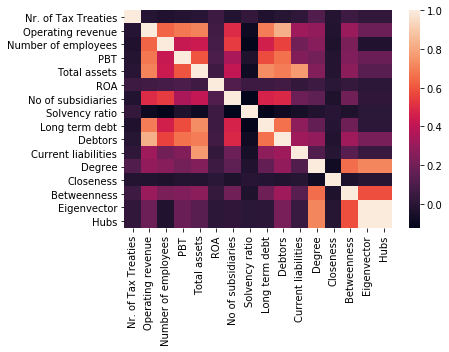

In [24]:
cormat = X_train.corr()
print(round(cormat,3))
sns.heatmap(cormat);

                     Number of employees    ETR
Number of employees                1.000  0.003
ETR                                0.003  1.000
                     Number of employees    ETR
Number of employees                1.000  0.003
ETR                                0.003  1.000
                     Number of employees    ETR
Number of employees                1.000  0.069
ETR                                0.069  1.000
                     Number of employees    ETR
Number of employees                1.000  0.144
ETR                                0.144  1.000


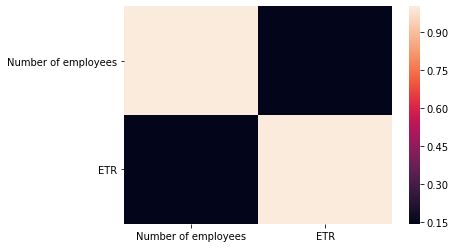

In [28]:
cormat = data_nonan[['Number of employees', 'ETR']].corr()
print(round(cormat,3))
#sns.heatmap(cormat)

cormat = data[['Number of employees', 'ETR']].corr()
print(round(cormat,3))
#sns.heatmap(cormat);

cormat = data_winsor[['Number of employees', 'ETR']].corr()
print(round(cormat,3))
#sns.heatmap(cormat);

cormat = data_winsor2[['Number of employees', 'ETR']].corr()
print(round(cormat,3))
sns.heatmap(cormat);

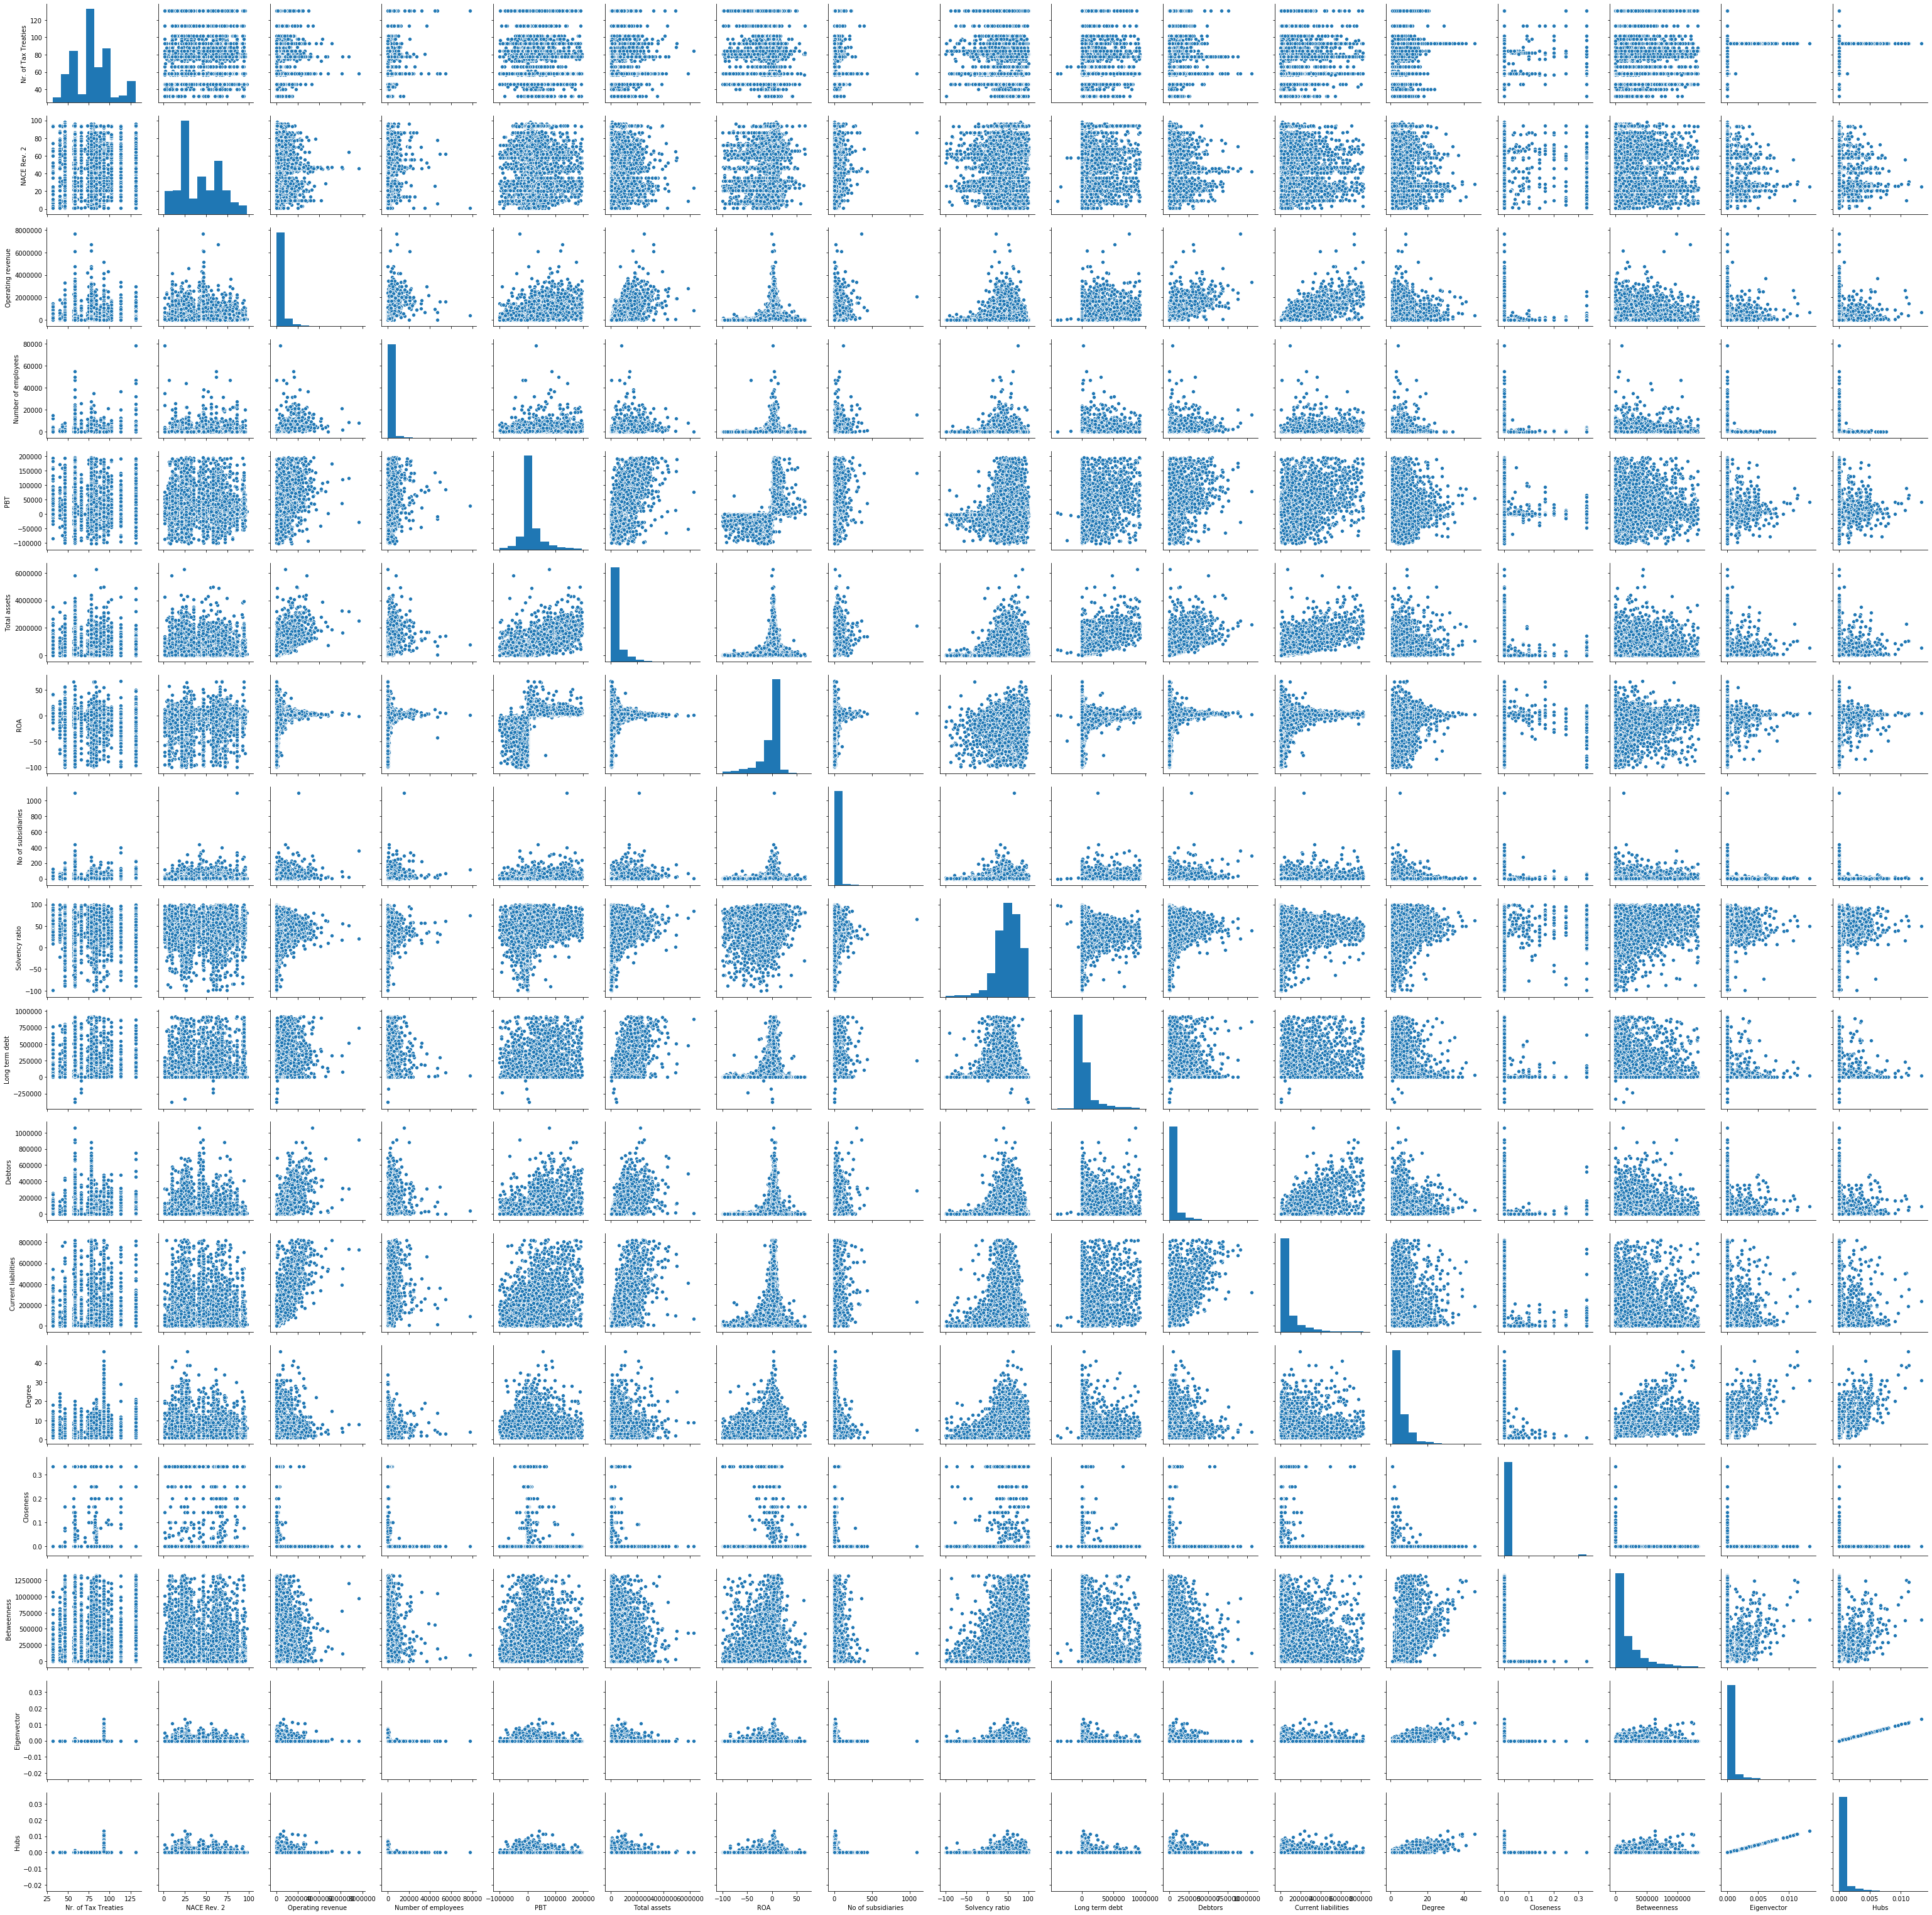

In [49]:
sns.pairplot(X_train_winsor2);

In [45]:
figure(figsize=(80, 40), dpi=200)
ax = sns.boxplot(data = data[["Operating revenue", "Number of employees",
          "PBT","Total assets","ROA","Solvency ratio","Long term debt","Debtors",
          "Current liabilities","Degree","Closeness","Betweenness","Eigenvector","Hubs"]], orient="h", palette = "Set2")
ax.set_xscale("log")

In [43]:
figure(figsize=(80, 40), dpi=200)
ax = sns.boxplot(data = data_winsor2[[ "Operating revenue", "Number of employees",
          "PBT","Total assets","ROA","No of subsidiaries", "Solvency ratio","Long term debt","Debtors",
          "Current liabilities","Degree","Closeness","Betweenness","Eigenvector","Hubs"]], orient="h", palette = "Set2")
ax.set_xscale("log")

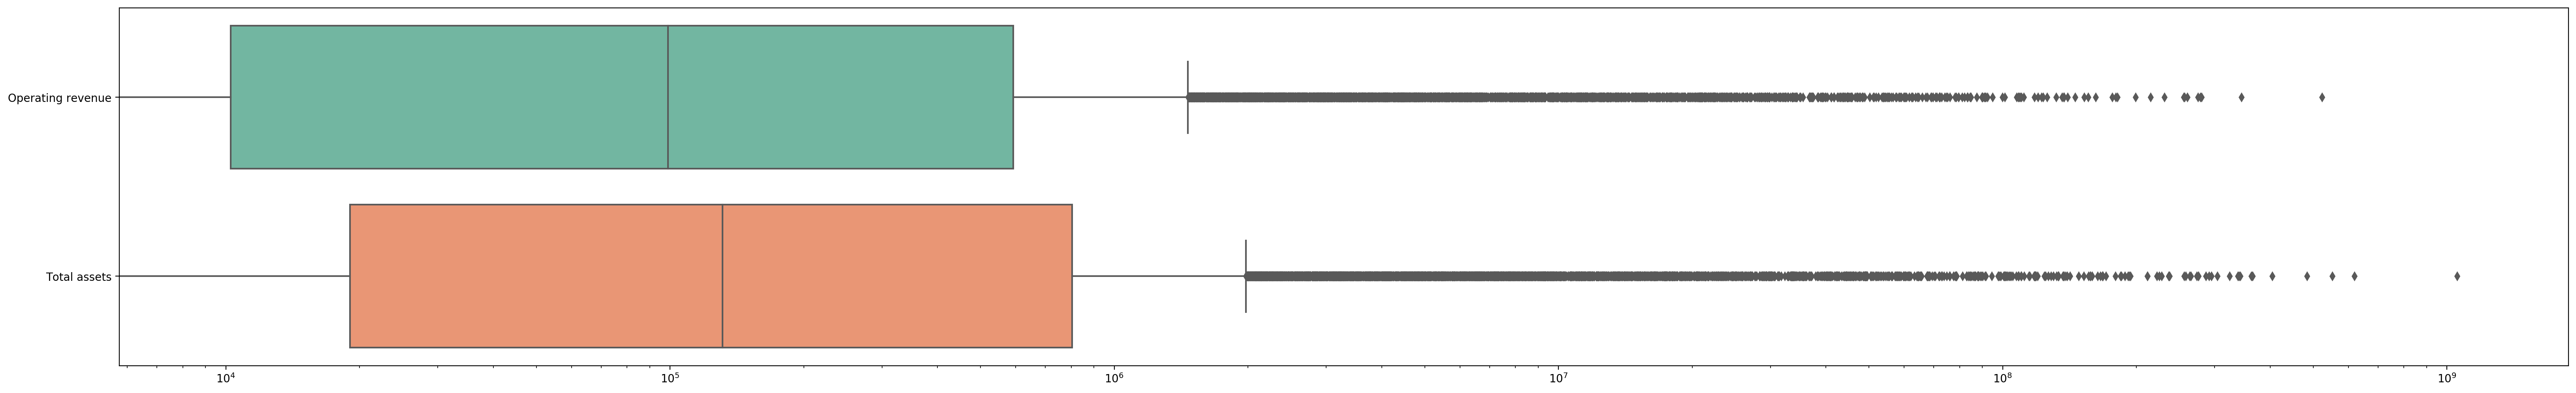

In [47]:
figure(figsize=(40, 6), dpi=200)
ax = sns.boxplot(data = data[["Operating revenue", #"Number of employees",
          "Total assets"#,"ROA","Solvency ratio","Long term debt","Debtors","PBT",
          ]], orient="h", palette = "Set2")

ax.set_xscale("log")

In [26]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

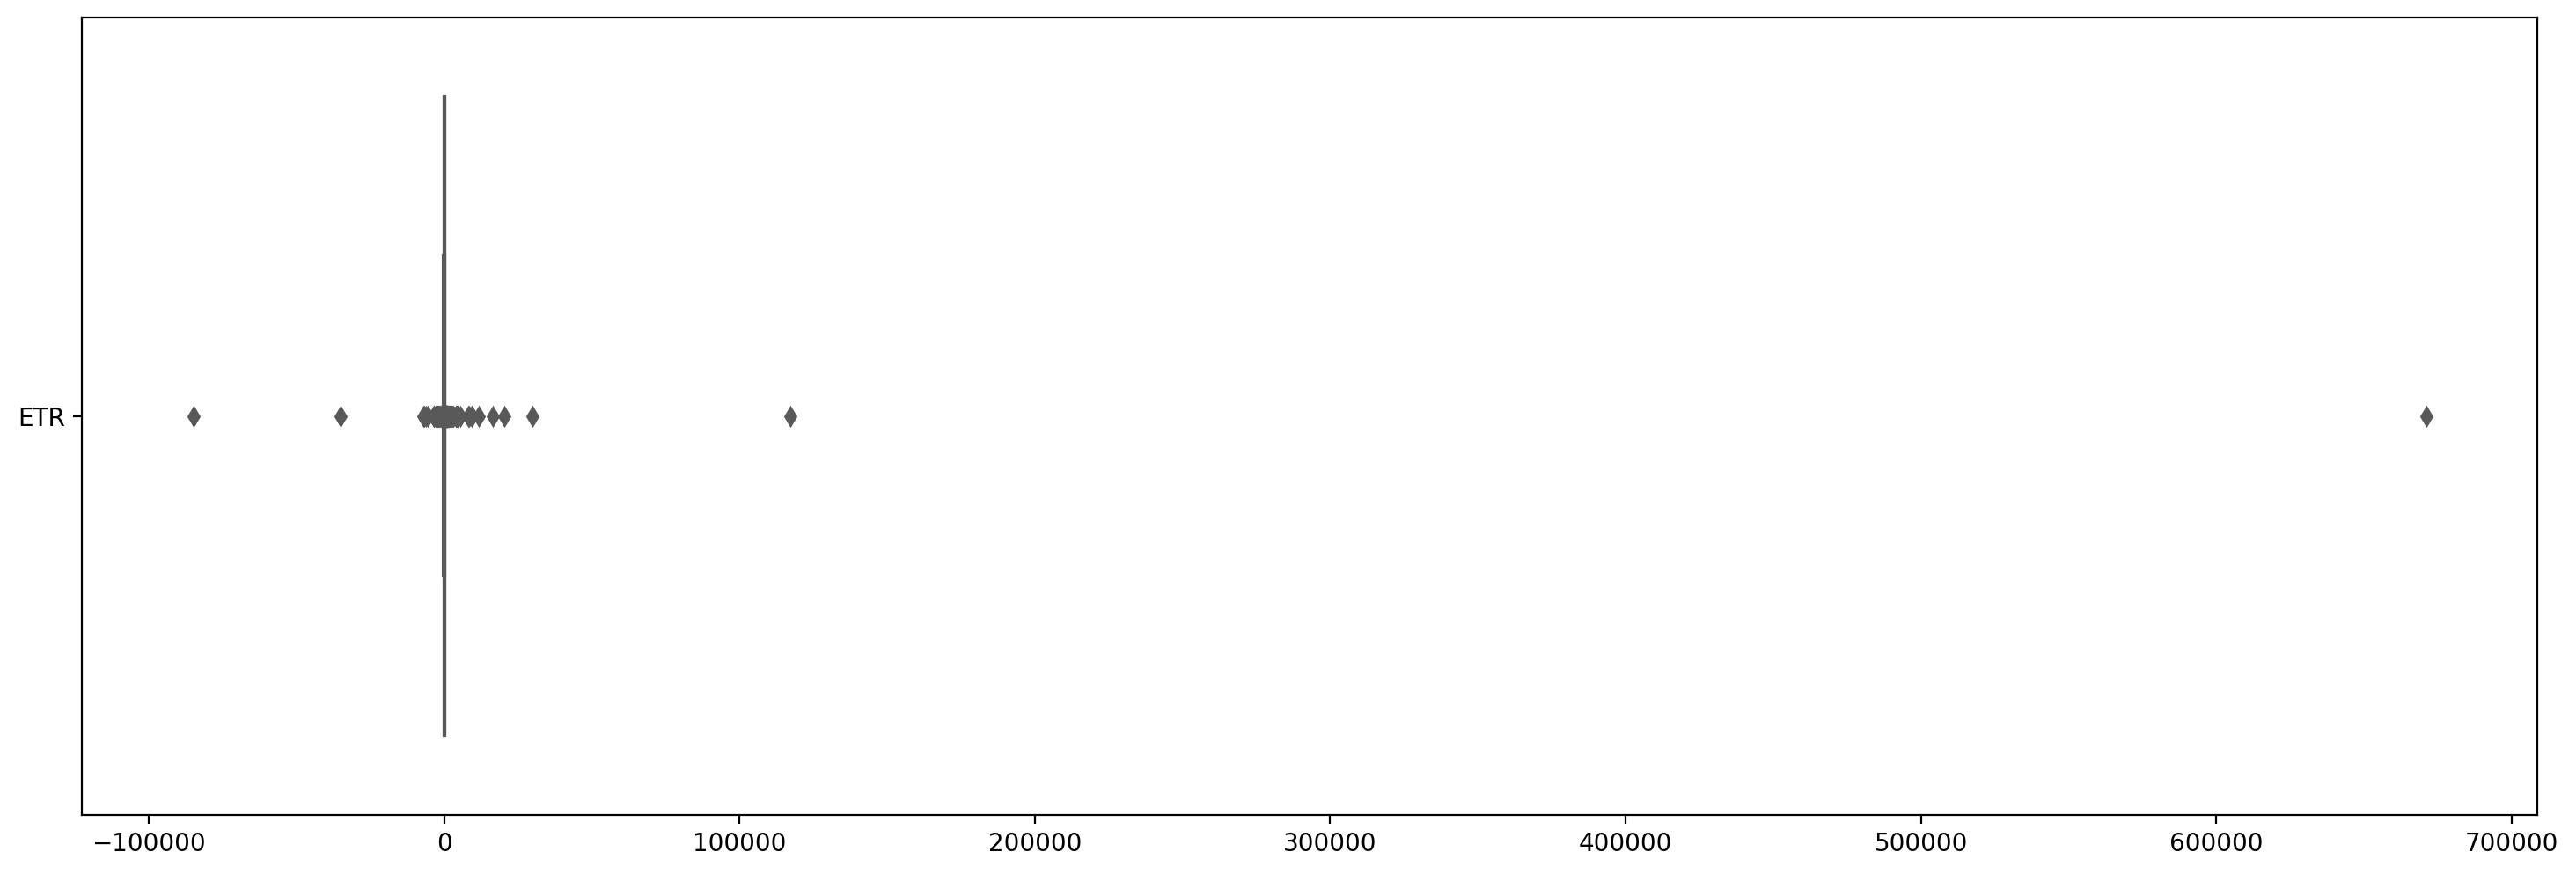

In [267]:
#sns.set(rc={'figure.figsize':(18,10)})
figure(figsize=(18, 6), dpi=200)
ax = sns.boxplot(data = data[["ETR"]], orient="h", palette = "Set2")

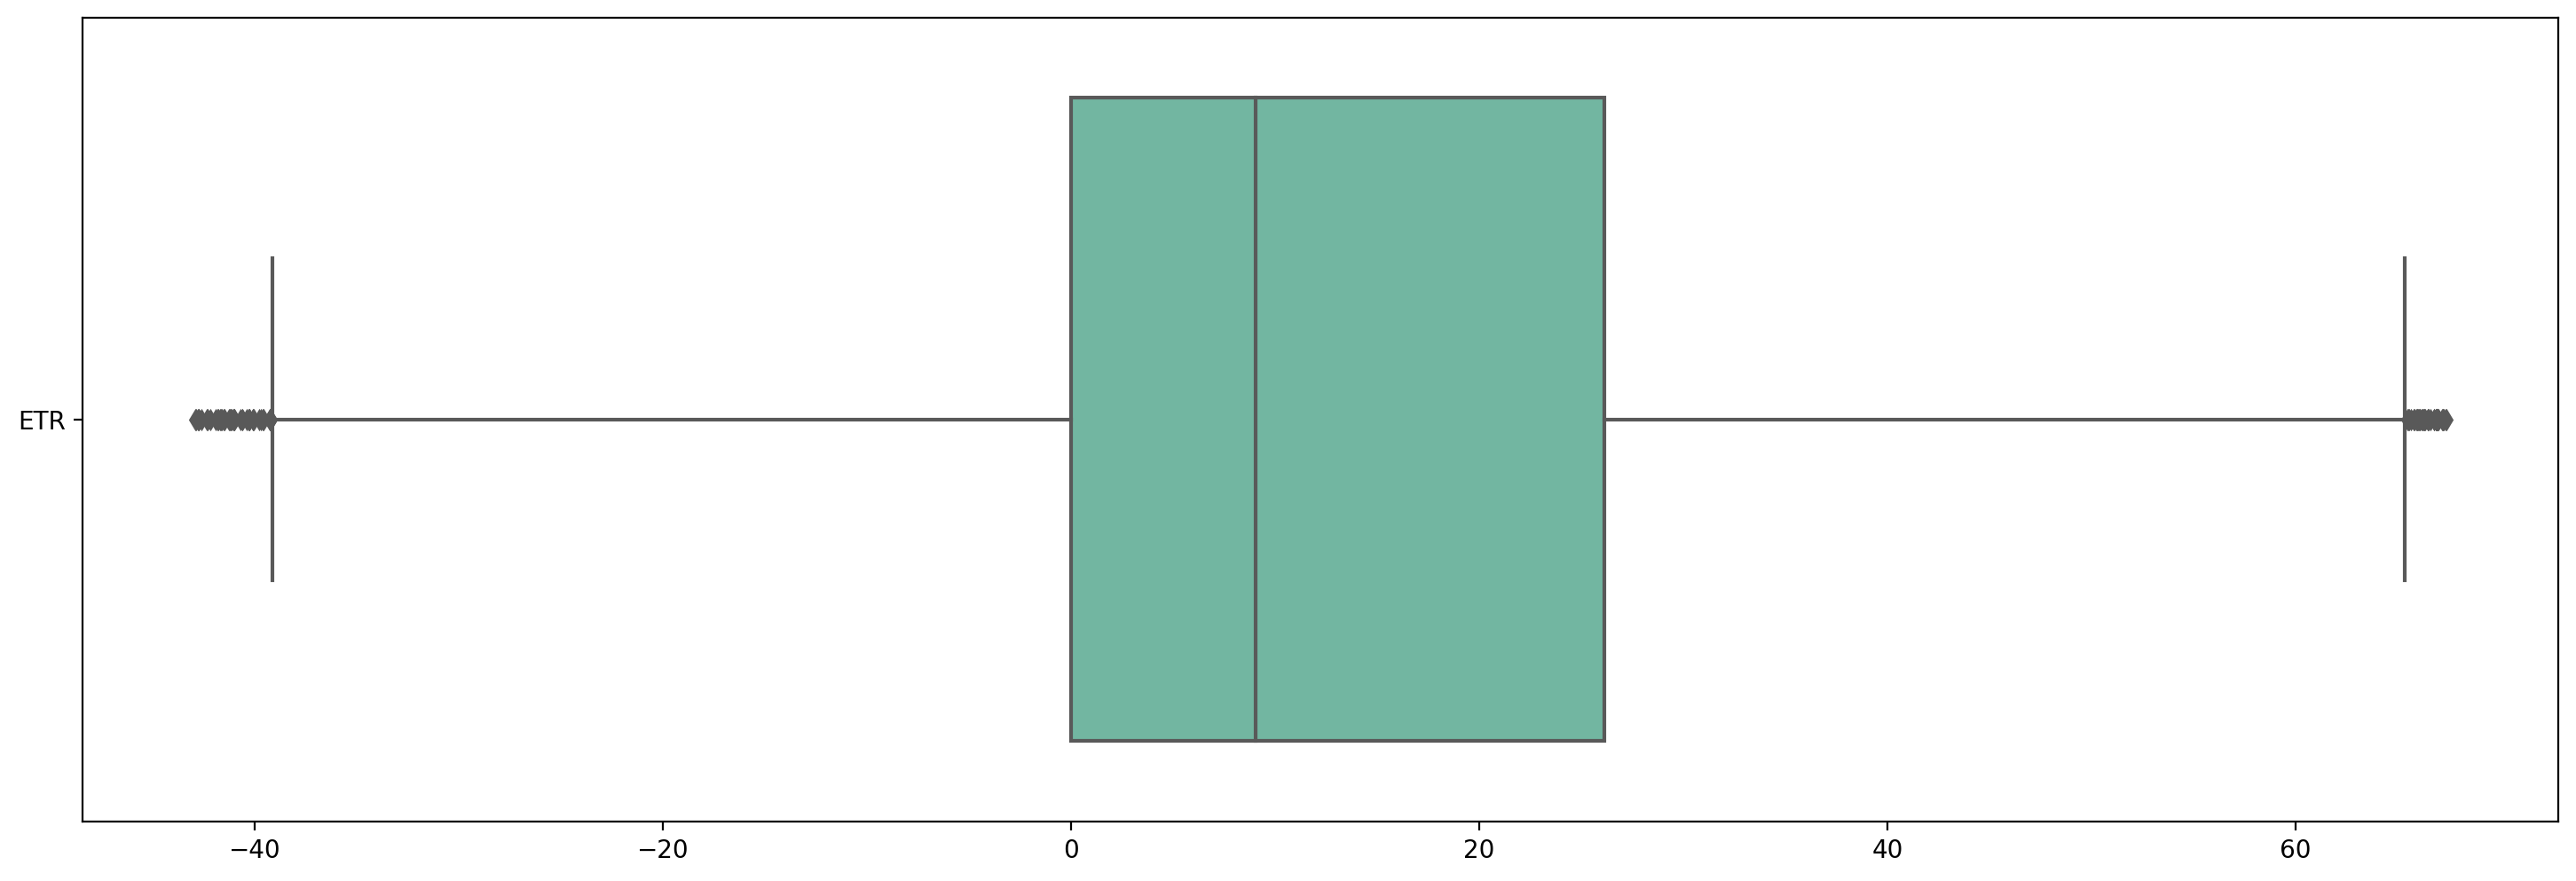

In [268]:
#sns.set(rc={'figure.figsize':(18,10)})
figure(figsize=(18, 6), dpi=200)
ax = sns.boxplot(data = data_winsor2[["ETR"]], orient="h", palette = "Set2")

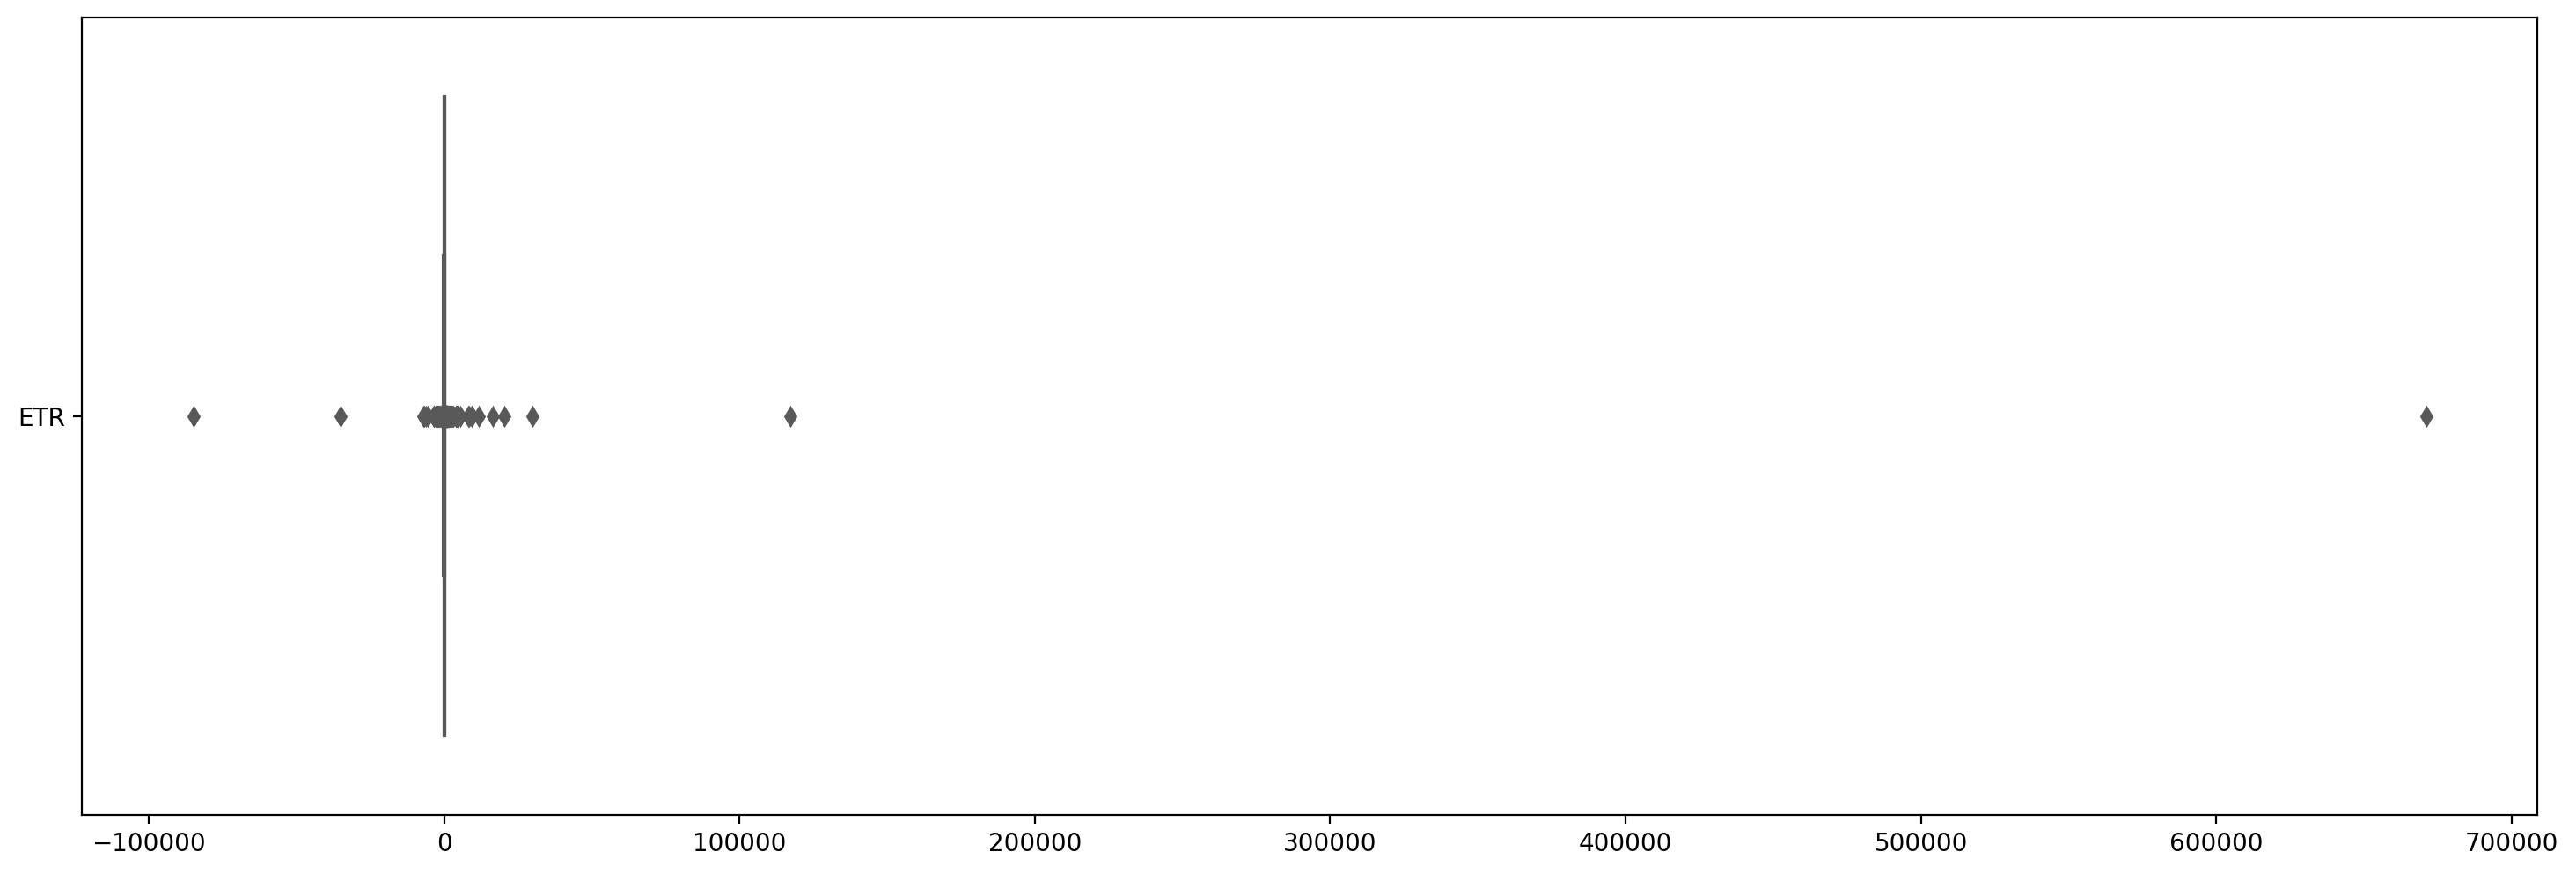

In [233]:
#sns.set(rc={'figure.figsize':(18,10)})
figure(figsize=(18, 6), dpi=200)
ax = sns.boxplot(data = data[["ETR"]], orient="h", palette = "Set2")

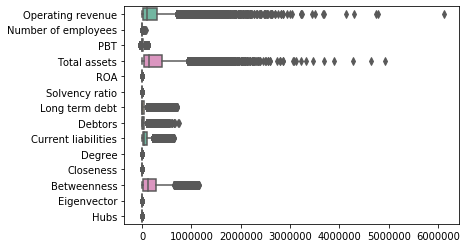

In [48]:
#sns.set(rc={'figure.figsize':(18,10)})
ax = sns.boxplot(data = data_winsor2[["Operating revenue", "Number of employees",
          "PBT","Total assets","ROA","Solvency ratio","Long term debt","Debtors",
          "Current liabilities","Degree","Closeness","Betweenness","Eigenvector","Hubs"]], orient="h", palette = "Set2")

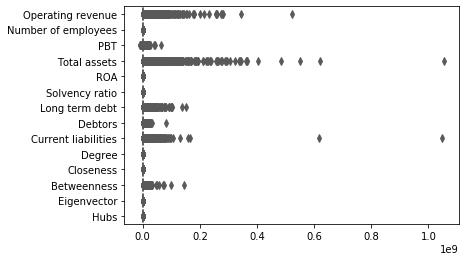

In [38]:
#sns.set(rc={'figure.figsize':(18,10)})
ax = sns.boxplot(data = data[["Operating revenue", "Number of employees",
          "PBT","Total assets","ROA","Solvency ratio","Long term debt","Debtors",
          "Current liabilities","Degree","Closeness","Betweenness","Eigenvector","Hubs"]], orient="h", palette = "Set2")

In [29]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV, GridSearchCV
from sklearn.metrics import classification_report

ImportError: cannot import name 'enable_halving_search_cv' from 'sklearn.experimental' (C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\experimental\__init__.py)

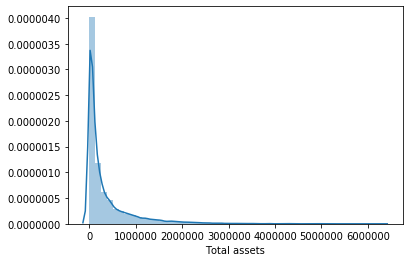

In [60]:
ax = sns.distplot(data_winsor2["Total assets"])
#ax.set_xscale("log")

In [34]:
reg = LinearRegression().fit(X_train_winsor2, y_train_winsor2)

C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\utils\validation.py:976: FutureWarning:

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.



ValueError: Unable to convert array of bytes/strings into decimal numbers with dtype='numeric'

In [ ]:
reg.score(X_test_winsor2, y_test_winsor2)

In [33]:
ks = sm.OLS(y_train_nonan, X_train_nonan)
ks_res =ks.fit()
ks_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    ETR   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                             0.4517
Date:                Fri, 25 Nov 2022   Prob (F-statistic):                       0.958
Time:                        14:00:03   Log-Likelihood:                         -72268.
No. Observations:                8412   AIC:                                  1.446e+05
Df Residuals:                    8398   BIC:                                  1.447e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
NACE Rev. 2             0.0481      0.482      0.100      0.921      -0.898       0.994
Operating revenue    3.302e-09   2.57e-06      0.001      0.999   -5.04e-06    5.04e-06
Number of employees  1.481e-05      0.001      0.027      0.979      -0.001       0.001
PBT                 -2.447e-06   1.82e-05     -0.134      0.893   -3.82e-05    3.33e-05
Total assets         -4.96e-07    3.3e-06     -0.150      0.881   -6.97e-06    5.97e-06
ROA                    -0.2535      0.837     -0.303      0.762      -1.894       1.387
Solvency ratio          0.5574      0.441      1.265      0.206      -0.306       1.421
Long term debt       6.673e-07   6.64e-06      0.100      0.920   -1.24e-05    1.37e-05
Debtors              3.434e-06   1.95e-05      0.176      0.861   -3.49e-05    4.18e-05
Current liabilities  1.201e-06   7.94e-06      0.151      0.880   -1.44e-05    1.68e-05
Degree                  0.8054      3.155      0.255      0.799      -5.380       6.991
Closeness             -34.4301    337.142     -0.102      0.919    -695.311     626.451
Betweenness         -9.341e-07   1.02e-05     -0.091      0.927    -2.1e-05    1.91e-05
Eigenvector         -6750.3386   1.89e+04     -0.357      0.721   -4.38e+04    3.03e+04
Hubs                -6750.3386   1.89e+04     -0.357      0.721   -4.38e+04    3.03e+04
==============================================================================
Omnibus:                    32012.290   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      21357581595.425
Skew:                          86.869   Prob(JB):                         0.00
Kurtosis:                    7807.129   Cond. No.                     8.52e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.06e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""